In [23]:
from pathlib import Path

import numpy as np

from PIL import Image, ImageFilter

from scipy.fft import dctn, idctn
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 12)

image = 'white-1024'
experiment = 'sharp_smooth'

output = Path('outputs') / image

output.mkdir(exist_ok=True, parents=True)

# Dropped because there is no exactly invertible sharpening and smoothening


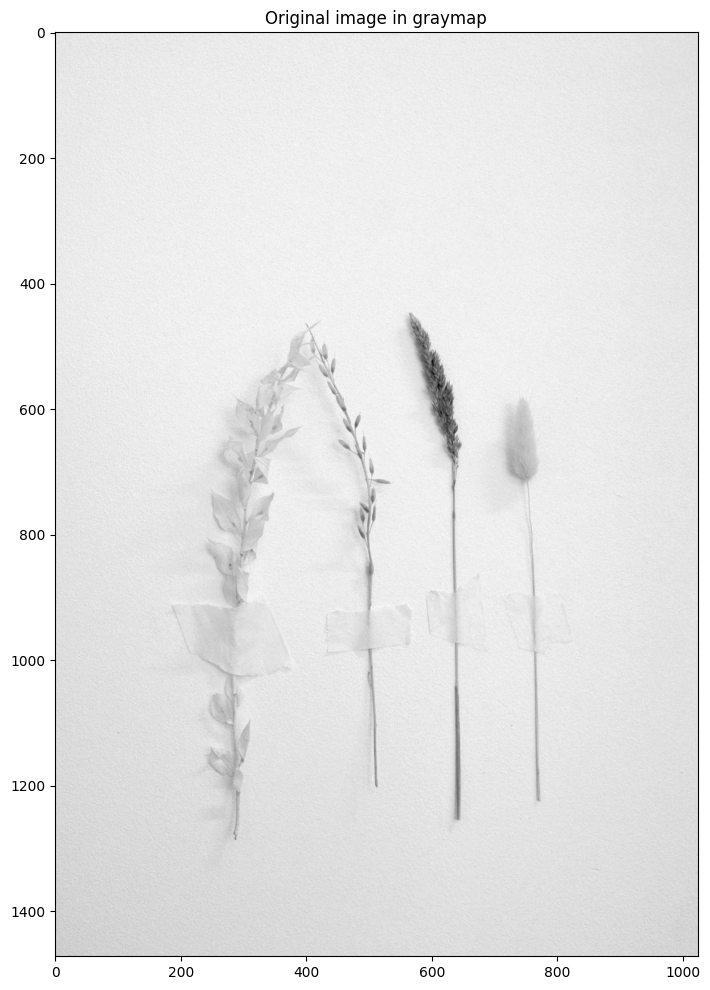

In [24]:
y, cb, cr = Image.open(f'../../images/{image}.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

plt.imsave(f'{output}/original.png', im, cmap='gray')

In [25]:
im_sharp = np.copy(im)

kernel_sharpen = np.matrix([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0],
])

kernel_smoothen = np.matrix([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
])

for i in np.r_[:im_sharp.shape[0]:8]:
    for j in np.r_[:im_sharp.shape[1]:1]:
        original_data = im[i-1:i+2, j-1:j+2]
        # print(i,j, original_data.shape)
        # original_data = im[i-1:i+1, j-1:j+1]
        # im_sharp[i-1:i+2, j-1:j+2] = 0
        # print(original_data.shape)
        if original_data.size == 9:
            spixel = (original_data * kernel_sharpen).sum() // 4
            print(im_sharp[i, j], spixel)
            im_sharp[i, j] = spixel
        

220 163
224 166
222 169
218 170
215 156
217 165
219 167
223 163
223 165
225 166
228 177
219 159
218 162
223 169
221 166
214 164
221 166
227 168
225 167
221 165
217 164
220 165
219 163
229 174
221 163
220 165
219 160
223 165
227 178
222 171
221 160
225 171
218 163
221 161
228 172
225 171
218 161
223 166
221 173
216 153
222 169
229 175
225 169
222 168
219 167
221 165
224 167
228 165
233 179
222 166
216 157
219 161
221 166
227 169
230 175
220 155
225 172
228 176
222 160
226 170
226 171
225 160
228 174
224 168
220 164
220 166
222 170
216 165
220 159
229 174
229 166
225 170
224 169
224 161
224 170
221 165
219 165
226 172
224 168
221 166
230 166
229 173
230 170
226 166
226 168
220 163
216 165
217 167
223 175
223 161
221 167
221 166
225 166
224 174
227 170
226 162
228 173
223 174
226 159
230 172
223 165
223 166
222 169
223 168
226 171
228 166
228 170
231 173
222 167
222 164
226 175
219 159
222 165
228 170
231 176
219 165
221 161
230 172
223 161
223 174
216 163
225 161
229 176
221 165
218 171


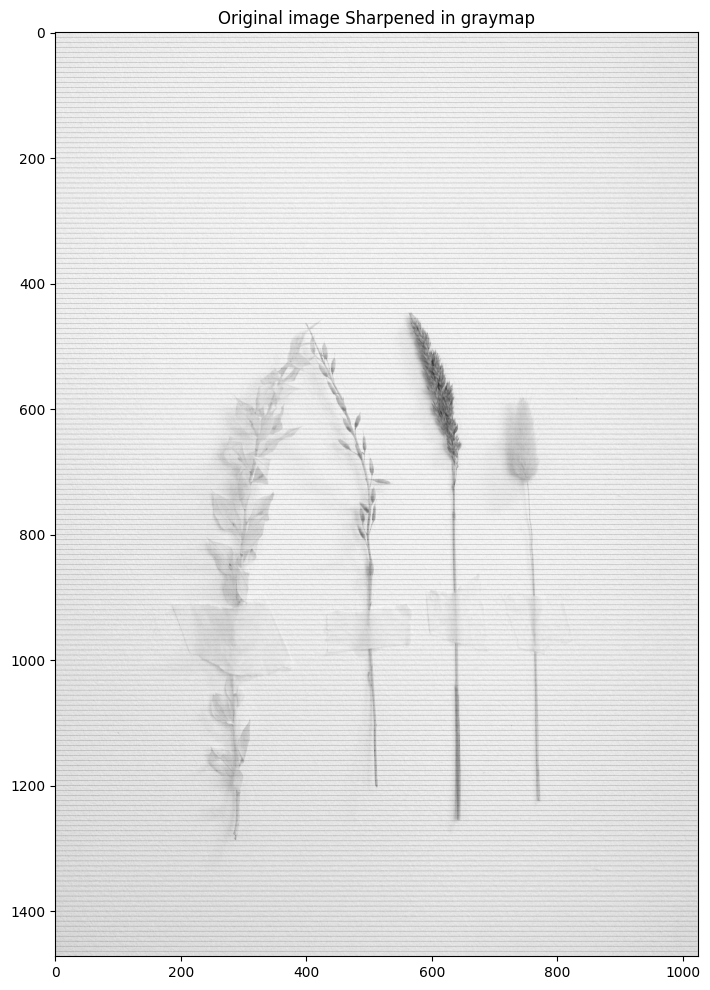

In [26]:
plt.figure()
plt.imshow(im_sharp, cmap='gray')
plt.title("Original image Sharpened in graymap")

plt.imsave(f'{output}/original_sharpened.png', im_sharp, cmap='gray')

In [27]:
quant_table = [
  16,  11,  10,  16,  24,  40,  51,  61,
  12,  12,  14,  19,  26,  58,  60,  55,
  14,  13,  16,  24,  40,  57,  69,  56,
  14,  17,  22,  29,  51,  87,  80,  62,
  18,  22,  37,  56,  68, 109, 103,  77,
  24,  35,  55,  64,  81, 104, 113,  92,
  49,  64,  78,  87, 103, 121, 120, 101,
  72,  92,  95,  98, 112, 100, 103,  99,
]

In [28]:
dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        dim = dctn(im_sharp[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

        dct[i:(i+8), j:(j+8)] = (np.rint(dim.ravel() / quant_table) * quant_table).reshape((8, 8))

Text(0.5, 1.0, '8x8 DCTs of the image')

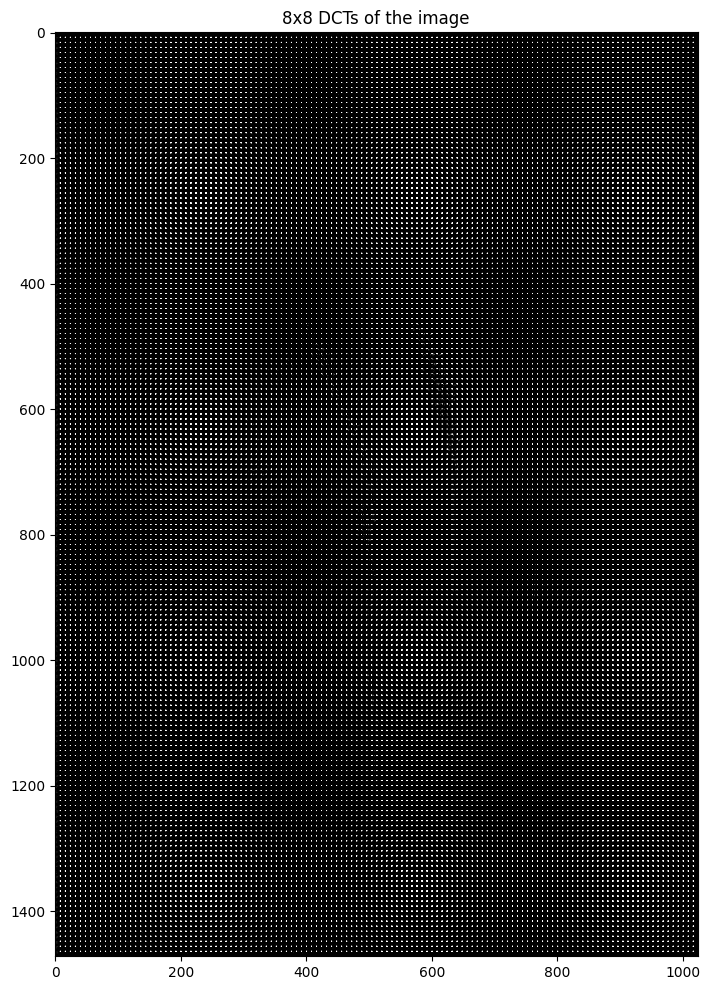

In [29]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.08, vmin=0)
plt.title("8x8 DCTs of the image")

In [30]:
im_rec = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        im_rec[i:(i+8),j:(j+8)] = idctn(dct[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

Text(0.5, 1.0, 'Image reconstructed after DCT Quantisation')

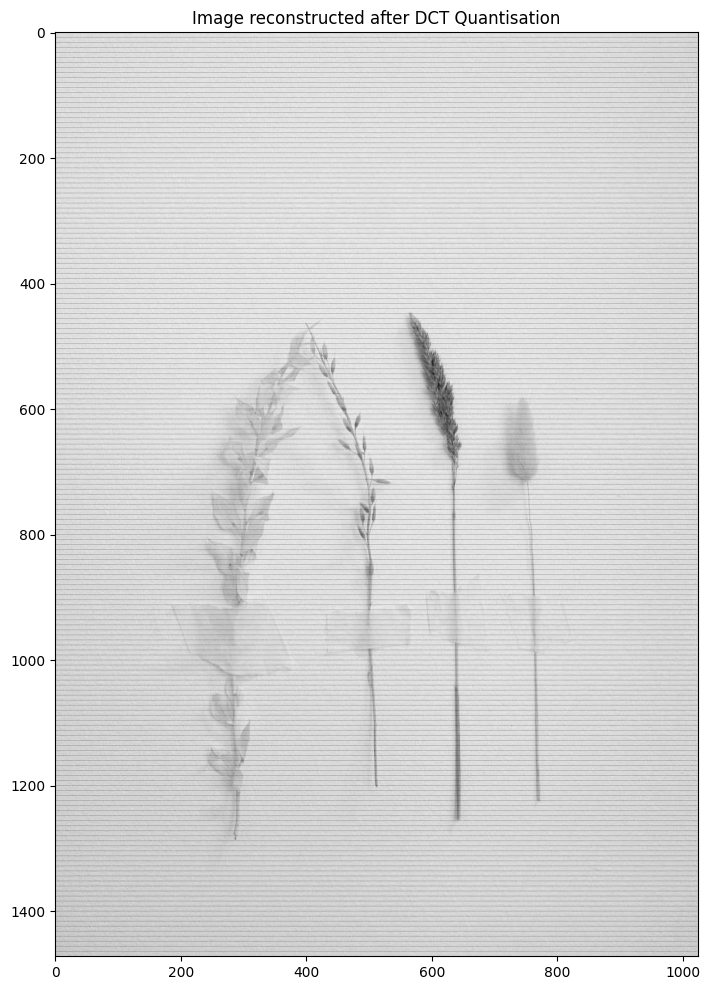

In [31]:
plt.figure()
plt.imshow(im_rec, cmap='gray')
plt.title("Image reconstructed after DCT Quantisation")

In [32]:
im_smooth = np.copy(im_rec)

for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:1]:
        original_data = im_rec[i-1:i+1, j-1:j+1]
        if original_data.size == 9:
            im_smooth[i-1:i+1, j-1:j+1] = im_rec[i-1:i+1, j-1:j+1] * kernel_smoothen

Text(0.5, 1.0, 'Smoothened Reconstructed image')

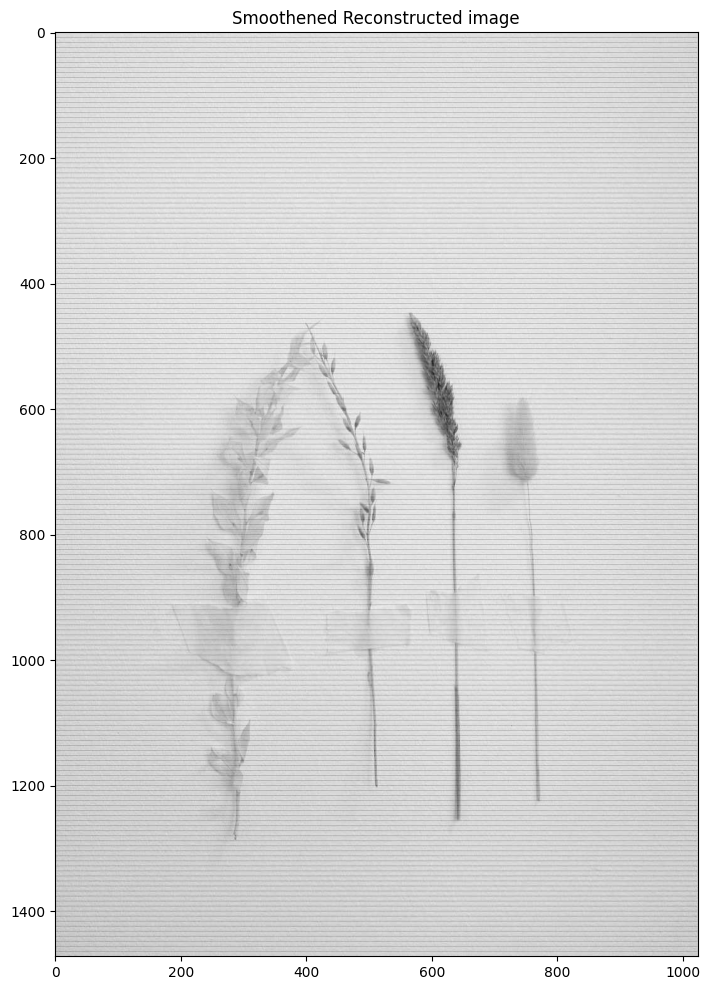

In [33]:
plt.figure()
plt.imshow(im_smooth, cmap='gray')
plt.title("Smoothened Reconstructed image")